In [2]:
import numpy as np
import pandas as pd
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from tensorflow.keras.models import load_model

2024-03-13 19:11:44.118765: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-13 19:11:44.159797: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-13 19:11:44.818190: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
import os
import sys
import pathlib
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)
current_file_path = pathlib.Path(os.getcwd())
parent_dir = current_file_path.parent
import swallowing_recognition

In [4]:
from swallowing_recognition import wavelet
from swallowing_recognition import dataset
from swallowing_recognition import long_audio

In [5]:
# directory_path = parent_dir / '30min_data'
directory_path = parent_dir 

In [6]:
path = directory_path / 'experiment'/ 'experiment_1'/'10min_osawa_20240227_1.wav'
# path = directory_path / 'experiment'/ 'preliminary_experiment'/ '20240215'/'water_washino_5min.wav'
# path = directory_path / 'uncropped_data'/ '20240205'/'tsuji_20data.wav'
# path = directory_path / '30min_data'/ 'washino20240205.wav'

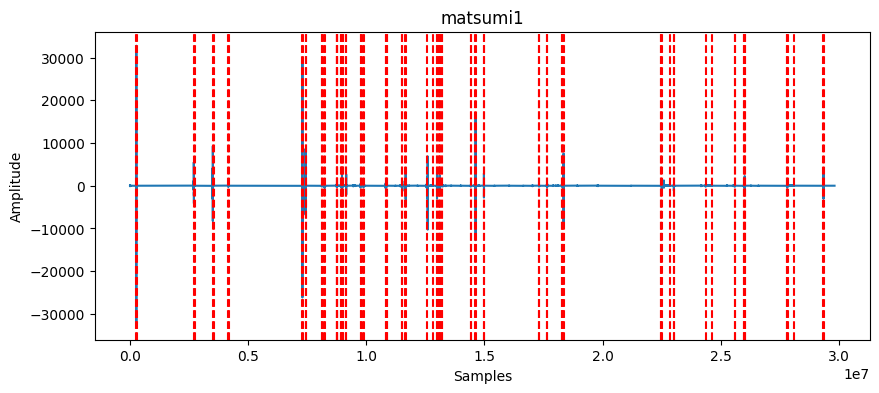

In [7]:
wav1 = long_audio.Long_audio(path)
# wav1.plot("lemon_washino_5min")
# wav1.plot("washino_20data")
wav1.plot("matsumi1")

In [8]:
current_path = directory_path
model_path = current_path / 'ipynb_swallowing' / '20240220_binary_ep50_bs32_v2.keras'
# model_path = current_path / 'ipynb_swallowing' / '20240220_binary_model_best.keras'
wav1.predict(model_path, 2)

2024-03-13 19:12:15.471696: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1026 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:65:00.0, compute capability: 8.6


(42, 224, 224, 3)


2024-03-13 19:12:34.552105: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2024-03-13 19:12:34.745118: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


2/2 [==============================] - 2s 125ms/step
Predicted classes: [0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1
 1 1 1 1 0]


## ここまでは必ずやる
やっていることは  
import  
どのwavファイルを解析するか指定  
wavファイルをデータセットにしウェーブレット変換  
変換したものを学習  

In [338]:
print(len(wav1.swallowing_start_idxs))
start_array = wav1.swallowing_start_idxs/44100
end_array = wav1.swallowing_end_idxs/44100

7


In [339]:
sections = np.arange(480, 601, 120)
# sections = np.arange(900, 1141, 120)
# sections = np.arange(180, 301, 120)
# sections = np.arange(900, 1201, 300)
counts, _ = np.histogram(start_array, bins=sections)


print("Sections:", sections)
print("Counts in each section:", counts)

Sections: [480 600]
Counts in each section: [0]


In [340]:
# 各セクションでの嚥下時間の合計と平均を計算するためのリスト
total_durations = []
mean_durations = []

# sections = np.arange(900, 1141, 120)
# sections = np.arange(960, 1201, 120)
# sections = np.arange(900, 1201, 300)

# セクションごとに処理
for i in range(len(sections) - 1):
    # セクション内での嚥下の開始と終了時間を抽出
    mask = (start_array >= sections[i]) & (start_array < sections[i + 1])    
    section_start_times = start_array[mask]
    section_end_times = end_array[mask]
    
    # 嚥下時間の計算
    swallow_durations = section_end_times - section_start_times
    
    # 嚥下時間の合計と平均の計算
    total_duration = np.sum(swallow_durations)
    mean_duration = np.mean(swallow_durations) if swallow_durations.size > 0 else 0  # 嚥下がない場合は平均を0とする
    
    # 結果をリストに追加
    total_durations.append(total_duration)
    mean_durations.append(mean_duration)
    
    # 結果の表示
    print(f"Section from {sections[i]} to {sections[i + 1]} seconds:")
    print(f"  Total swallowing duration: {total_duration} seconds")
    print(f"  Mean swallowing duration: {mean_duration:.2f} seconds\n")

Section from 480 to 600 seconds:
  Total swallowing duration: 0.0 seconds
  Mean swallowing duration: 0.00 seconds



In [342]:
wav1.save_png_swallowing_number_line('shibata_1.png')
wav1.display_HTML('shibata_1.png')

26543808


### wavファイルの嚥下と識別された部分を図示

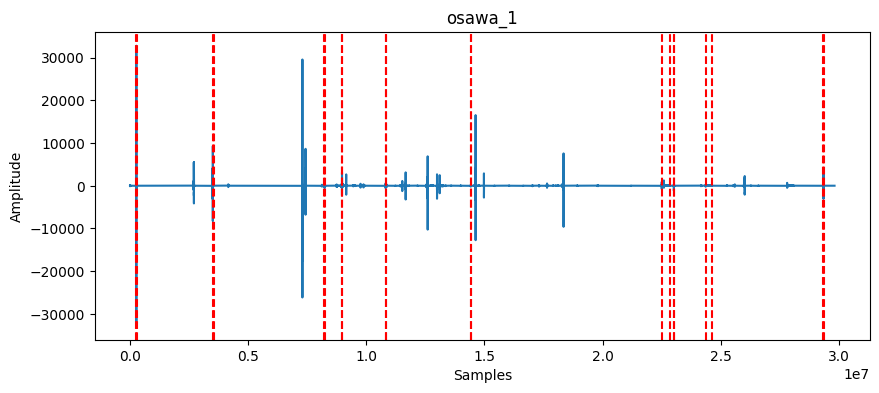

In [9]:
# wav1.plot_predicted("lemon_washino_5min.wav")
wav1.plot_predicted("osawa_1")

### 嚥下回数を前後30秒の計60秒で何回しているか図示

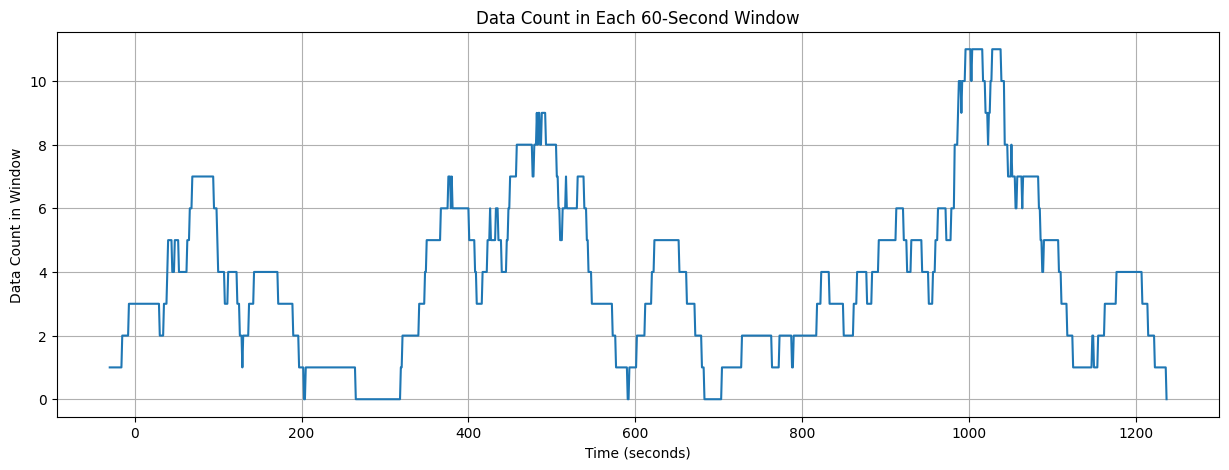

In [77]:
wav1.plot_swallowing_count(window_size = 30, interval = 1)

### 唾液推定に必要な数字を算出
wavファイル内の嚥下回数  
ある範囲の回数を認識
リスト形式でプリント
嚥下の時間を算出

In [41]:
start_list = list(start_array)
end_list = list(end_array)
print(start_list)
# print(end_list)

[3.588344671201814, 9.152222222222223, 17.943696145124715, 18.963061224489795, 30.08392290249433, 59.48609977324263, 63.918503401360546, 71.23768707482994, 71.85460317460317, 74.19390022675736, 75.33875283446712, 79.90963718820862, 83.12718820861679, 93.70986394557823, 95.25886621315193, 98.45453514739229, 101.87961451247166, 106.04689342403628, 113.02789115646259, 115.08267573696145, 116.74342403628118, 120.62049886621315, 129.2977551020408, 133.9398866213152, 136.09938775510204, 153.23276643990928, 154.9039909297052, 155.41657596371883, 166.90090702947845, 168.74108843537414, 171.78986394557822, 176.67145124716552, 176.98013605442176, 179.73591836734693, 180.5351700680272, 184.760589569161, 191.05809523809523, 192.8021088435374, 195.98716553287983, 196.97664399092972, 198.1581179138322, 200.11326530612246, 206.51074829931972, 208.0398866213152, 209.05163265306123, 210.94433106575963, 222.12249433106575, 225.81056689342404, 228.1591609977324, 229.28997732426305, 230.52358276643992, 23

In [32]:
time = end_array - start_array
print(list(time))
print((np.mean(time)))
print(np.sum(time))

[0.46603174603174624, 0.3313605442176861, 0.13160997732426338, 0.12786848072562407, 0.06517006802721426, 0.6180498866213142, 1.2189569160997777, 0.35081632653060524, 1.2084580498866302, 0.9109750566893524, 0.6244217687074922, 0.5120408163265324, 0.7241043083900109, 0.723151927437641, 0.2404535147392295, 0.7113378684807259, 0.3021768707482977, 0.5167573696145098, 0.5674149659863872, 1.4115873015873035, 0.51741496598639, 0.8056916099773161, 0.48585034013606787, 0.13446712018139806, 0.5768253968253987, 1.3361904761904952, 0.2890476190476363, 0.3097505668934275, 0.4485941043083983, 0.7572108843537535, 0.0482312925170163, 0.05600907029480595, 0.8237868480725581, 0.5634920634920775, 0.7558956916099646, 0.4520634920635018, 1.3767800453514667, 0.10603174603176058, 0.6749886621315113, 0.34027210884352144, 1.6785714285714164, 0.3625170068027046, 0.1251247165533016, 0.687777777777768, 0.2977097505668951, 1.0697505668934468, 0.6482539682539823, 0.14131519274377524, 0.4646938775510421, 1.0083219954

### wavファイルの波形と嚥下タイミングを描画

In [7]:
wav1.save_plots_to_pdf('20240205washino\30min.pdf')